In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [155]:
color_pallete = ['#A6242F','#181E40','#565759','#1C3659','#F2F2F2']

# Import and prep assessment datasets

### OVERALL ACHIEVEMENT RATE

In [3]:
assesment_district = pd.read_excel("../data/Education 2021_24/Assesment/district_assessment_file_suppressed_2024.xlsx")

In [4]:
assesment_district.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2024,10,Anderson County,EOC,Algebra I,10,All Students,*,10,9,8,*,*,*,*,*,*,*,*,*
1,2024,10,Anderson County,EOC,Algebra I,10,Black or African American,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2024,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,4,3,2,*,*,*,*,*,*,*,*,*
3,2024,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,*,3,2,2,*,*,*,*,*,*,*,*,*
4,2024,10,Anderson County,EOC,Algebra I,10,English Learners,*,1,1,0,*,*,*,*,*,*,*,*,*


In [5]:
#assesment_district.drop(['pct_below', 'pct_approaching',
                          ## 'pct_met_exceeded'], axis=1, inplace=True)

In [6]:
assesment_district['participation_rate'] =  pd.to_numeric(assesment_district['participation_rate'], errors = 'coerce')
assesment_district['tested'] =  pd.to_numeric(assesment_district['tested'], errors = 'coerce')
assesment_district['valid_tests'] =  pd.to_numeric(assesment_district['valid_tests'], errors = 'coerce')
assesment_district['n_met_expectations'] =  pd.to_numeric(assesment_district['n_met_expectations'], errors = 'coerce')
assesment_district['n_exceeded_expectations'] =  pd.to_numeric(assesment_district['n_exceeded_expectations'], errors = 'coerce')
assesment_district['pct_met_exceeded'] =  pd.to_numeric(assesment_district['pct_met_exceeded'], errors = 'coerce')


In [8]:
clean = assesment_district[(assesment_district['student_group']== "All Students") & (assesment_district['grade']== "All Grades")]
met_exc = (clean['n_met_expectations'] + clean['n_exceeded_expectations'])
met_exc.sum()/clean['valid_tests'].sum()*100

39.63382639453244

In [9]:
# achievement accross districts
clean['achieved'] = clean['n_exceeded_expectations']+clean['n_met_expectations']
clean_grouped = clean.groupby('system_name').agg(achievement_total = ('achieved', 'sum'),
                                 number_total = ('valid_tests','sum')).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_30888\714750121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['achieved'] = clean['n_exceeded_expectations']+clean['n_met_expectations']


In [10]:
#achievement rate by country
clean_grouped['achievement_ratio'] = round(clean_grouped['achievement_total']*100/clean_grouped['number_total'],2)
clean_grouped.sort_values(by = 'achievement_ratio', ascending = False, inplace = True)
clean_grouped.head()

,system_name,achievement_total,number_total,achievement_ratio
145,Williamson County,62464.0,86777,71.98
27,Collierville,13157.0,19008,69.22
45,Germantown,8065.0,11808,68.30
88,Maryville,7836.0,11676,67.11
5,Arlington,5963.0,9156,65.13


Text(0.5, 1.0, 'Top ten districs by overall achievement rate')

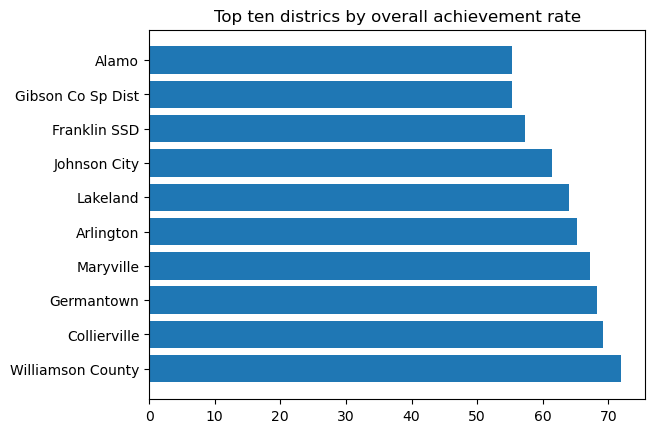

In [11]:
#graph top 10 
large_10 = clean_grouped.nlargest(10, 'achievement_ratio')

plt.barh(large_10['system_name'], large_10['achievement_ratio'])
plt.title("Top ten districs by overall achievement rate")

Text(0.5, 1.0, 'The Bottom 10 districts by overall achievement rate')

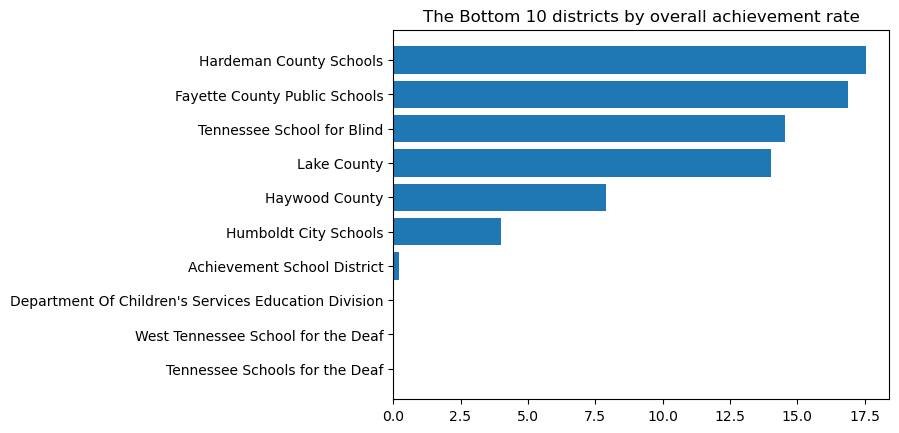

In [12]:
#graph bottom 10 
smallest_10 = clean_grouped.nsmallest(10, 'achievement_ratio')

plt.barh(smallest_10['system_name'], smallest_10['achievement_ratio'])
plt.title("The Bottom 10 districts by overall achievement rate")

### achievement by race

In [14]:
grade = range(3,13)
race = ['Black or African American', 
         'Hispanic',
         'American Indian or Alaska Native', 
         'White', 
         'Native Hawaiian or Other Pacific Islander', 
         'Asian']
         
assesment_race = assesment_district[(assesment_district['student_group'].isin(race)) & (assesment_district['grade']== "All Grades")]
assesment_race.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
72,2024,10,Anderson County,EOC,Algebra I,All Grades,American Indian or Alaska Native,NaN,2,2,2,*,*,NaN,NaN,*,*,*,*,NaN
73,2024,10,Anderson County,EOC,Algebra I,All Grades,Asian,NaN,7,7,6,*,*,NaN,NaN,*,*,*,*,NaN
74,2024,10,Anderson County,EOC,Algebra I,All Grades,Black or African American,100.0,18,18,18,**,**,NaN,NaN,**,**,**,**,33.3
82,2024,10,Anderson County,EOC,Algebra I,All Grades,Hispanic,86.0,21,18,16,**,**,NaN,NaN,**,**,**,**,25.0
85,2024,10,Anderson County,EOC,Algebra I,All Grades,Native Hawaiian or Other Pacific Islander,NaN,2,2,2,*,*,NaN,NaN,*,*,*,*,NaN


In [15]:
assesment_race['achieved'] = assesment_race['n_met_expectations'] + assesment_race['n_exceeded_expectations']
race_groups = (assesment_race.groupby('student_group')
               .agg(valid_tests = ('valid_tests', 'sum'), 
                    achieved_total= ('achieved', 'sum')).reset_index())
race_groups                       

C:\Users\HP\AppData\Local\Temp\ipykernel_30888\1340987554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assesment_race['achieved'] = assesment_race['n_met_expectations'] + assesment_race['n_exceeded_expectations']


,student_group,valid_tests,achieved_total
0,American Indian or Alaska Native,9669,2934.0
1,Asian,52499,33526.0
2,Black or African American,472406,103468.0
3,Hispanic,278546,77438.0
4,Native Hawaiian or Other Pacific Islander,5367,1580.0
5,White,1153826,551323.0


In [16]:
race_groups['achievement_rate'] = round(race_groups['achieved_total']*100/(race_groups['valid_tests']),2)
race_groups.sort_values(by='achievement_rate', ascending = False, inplace = True) 

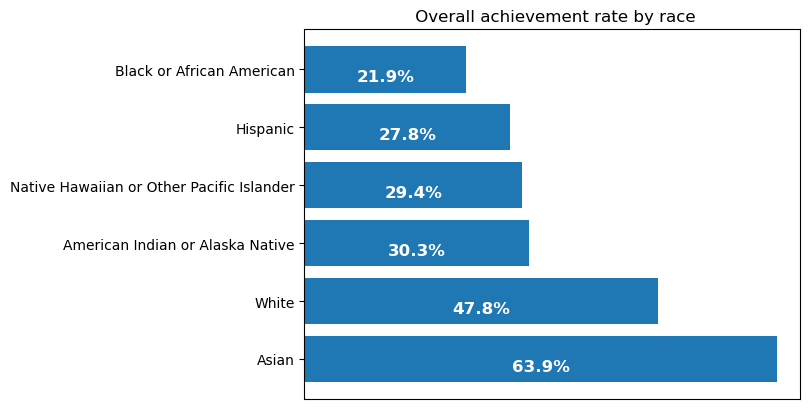

In [17]:

# Create figure and axis
fig, ax = plt.subplots()
# Remove x-axis ticks
ax.set_xticks([])

# Plot bars
bars = ax.barh(race_groups['student_group'],  race_groups['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() /2 ,  # X-position (center of bar)
        bar.get_y() + bar.get_height() / 2,  # Y-position (center of the bar)
        f"{bar.get_width():.1f}%",  # Label text with one decimal place
        ha='center', va='top', fontsize=12, fontweight='bold', color='white'
    )

# Labels and title
plt.title(" Overall achievement rate by race")
plt.show()

### achievement rate by gender

In [19]:
gender = ['Male', 'Female']
clean_gender = (assesment_district[(assesment_district['student_group'].isin(gender)) & 
                                    (assesment_district['grade']== "All Grades")])
clean_gender.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
80,2024,10,Anderson County,EOC,Algebra I,All Grades,Female,97.0,263,256,254,72,103,54.0,25.0,28.3,40.6,21.3,9.8,31.1
84,2024,10,Anderson County,EOC,Algebra I,All Grades,Male,97.0,270,261,260,88,96,58.0,18.0,33.9,36.9,22.3,6.9,29.2
165,2024,10,Anderson County,EOC,Algebra II,All Grades,Female,97.0,236,230,230,34,107,85.0,4.0,14.8,46.5,37,1.7,38.7
169,2024,10,Anderson County,EOC,Algebra II,All Grades,Male,96.0,282,271,267,49,148,66.0,4.0,18.4,55.4,24.7,1.5,26.2
284,2024,10,Anderson County,DLM/Alt-Science/Social Studies,Biology I,All Grades,Female,NaN,3,3,3,*,*,NaN,NaN,*,*,*,*,NaN


In [20]:

clean_gender['achieved'] = clean_gender['n_met_expectations']  + clean_gender['n_exceeded_expectations'] 
geder_grouped = (clean_gender.groupby('student_group')
                 .agg(achieved_total = ('achieved','sum'),
                      tests_total = ('valid_tests', 'sum')).reset_index())
                
geder_grouped                

C:\Users\HP\AppData\Local\Temp\ipykernel_30888\2812868801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_gender['achieved'] = clean_gender['n_met_expectations']  + clean_gender['n_exceeded_expectations']


,student_group,achieved_total,tests_total
0,Female,383600.0,960715
1,Male,395186.0,1011598


In [21]:
geder_grouped['achievement_rate'] = round(geder_grouped['achieved_total']*100/geder_grouped['tests_total'],2)

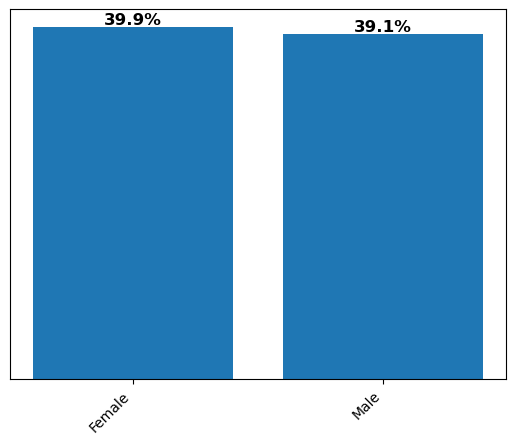

In [22]:

# Create figure and axis
fig, ax = plt.subplots()
ax.set_yticks([])
# Plot bars
bars = ax.bar(geder_grouped['student_group'],  geder_grouped['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        bar.get_height(),  # Y-position (height of the bar)
        f"{bar.get_height():.1f}%",  # Label text with one decimal place
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Labels and title
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [23]:
#PLOT MAP FOR DISTRICTS

## overall student behavior attendance and discipline


### DISTRICT achievement rate vs student behavior 
schatter plot

In [26]:
#import discipline data
dicipline_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='District' )
dicipline_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='District')
dicipline_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='District')
dicipline_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='District')

In [27]:
dicipline_21.columns

Index(['School Year', 'District', 'District Name', 'Students Iss',
       'Students Suspended', 'Students Expelled',
       'Students Transferred To Alternative School',
       'Students Committed Zero Tolerance', 'Disciplined Total', 'Percent Iss',
       'Percent Suspended', 'Percent Expelled',
       'Percent Transferred To Alternative School',
       'Percent Committed Zero Tolerance', 'Percent Disciplined'],
      dtype='object')

In [28]:
#clean School year and create year column
dicipline_21['year']=  '20'+dicipline_21['School Year'].str[-2:]
dicipline_22['year']=  '20'+dicipline_22['School Year'].str[-2:]
dicipline_23['year']=  '20'+dicipline_23['School Year'].str[-2:]
dicipline_24['year']=  '20'+dicipline_24['School Year'].str[-2:]
#subset the datasets for the required columns
dicipline_21 = dicipline_21[['year', 'District Name', 'Percent Disciplined']]
dicipline_22 = dicipline_22[['year', 'District Name', 'Percent Disciplined']]
dicipline_23 = dicipline_23[['year', 'District Name', 'Percent Disciplined']]
dicipline_24 = dicipline_24[['year', 'District Name', 'Percent Disciplined']]
#combine the data sets
discipline = pd.concat([dicipline_21,dicipline_22,dicipline_23,dicipline_24])

discipline.head()

,year,District Name,Percent Disciplined
0,2021,State of Tennessee,3.9
1,2021,Anderson County,7.2
2,2021,Clinton,-10.0
3,2021,Oak Ridge,8.4
4,2021,Bedford County,5.7


In [29]:
#data conversion
discipline['Percent Disciplined'] = pd.to_numeric(discipline['Percent Disciplined'], errors = 'coerce')
# group for districts
discipline_districts = discipline.groupby(['year','District Name'])['Percent Disciplined'].mean().reset_index()
discipline_districts.tail()

,year,District Name,Percent Disciplined
591,2024,West Carroll Sp Dist,2.2
592,2024,West Tennessee School for the Deaf,NaN
593,2024,White County,10.8
594,2024,Williamson County,5.4
595,2024,Wilson County,11.0


In [30]:
len(discipline_districts[discipline_districts['Percent Disciplined'] <0])

34

In [31]:
#subset the data to filter for suspension rules
discipline_clean = discipline_districts[discipline_districts['Percent Disciplined'] >= 0]

In [465]:
#state wide percent _ disciplined
discipline_state_year = discipline_clean.groupby('year')['Percent Disciplined'].mean().reset_index()
discipline_state_year

,year,Percent Disciplined
0,2021,4.775781
1,2022,8.304412
2,2023,8.223134
3,2024,8.870896


In [463]:
#discipline across districts
avg_district_dicipline = (discipline_clean.groupby(['year','District Name'])['Percent Disciplined']
                          .mean().reset_index())
avg_district_dicipline

,year,District Name,Percent Disciplined
0,2021,Achievement School District,1.0
1,2021,Alcoa,2.0
2,2021,Anderson County,7.2
3,2021,Arlington,1.7
4,2021,Athens,1.8
...,...,...,...
527,2024,Weakley County,3.2
528,2024,West Carroll Sp Dist,2.2
529,2024,White County,10.8
530,2024,Williamson County,5.4


In [33]:
#import absenteeism data
absenteeism_21 = pd.read_csv('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_20-21.csv')
absenteeism_22 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_21-22.xlsx')
absenteeism_23 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_2023.xlsx')
absenteeism_24 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_2024.xlsx')
#check shape
print(absenteeism_21.shape)
print(absenteeism_22.shape)
print(absenteeism_23.shape)
print(absenteeism_24.shape)

(4416, 7)
(4444, 7)
(4479, 7)
(5341, 7)


In [34]:
absenteeism_21.columns

Index(['system', 'system_name', 'subgroup', 'grade_band', 'n_students',
       'n_chronically_absent', 'pct_chronically_absent'],
      dtype='object')

In [35]:
#rename columns
absenteeism_21 = absenteeism_21.rename(columns = {'subgroup':'student_group'})

In [36]:
#add year column
absenteeism_21['year'] = '2021'
absenteeism_22['year'] = '2022'
absenteeism_23['year'] = '2023'
absenteeism_24['year'] = '2024'


In [37]:
#subset the data for usable columns
absenteeism_21 = absenteeism_21[['year','system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_22 = absenteeism_22[['year','system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_23 = absenteeism_23[['year', 'system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_24 = absenteeism_24[['year', 'system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
# combine the dataset 
absenteeism = pd.concat([absenteeism_21,absenteeism_22,absenteeism_23,absenteeism_24],ignore_index = True)


In [471]:
#convert columns to numeric
absenteeism['pct_chronically_absent'] = pd.to_numeric(absenteeism['pct_chronically_absent'] , errors= 'coerce')
#remove negative entries
absenteeism = absenteeism[absenteeism['pct_chronically_absent'] >=0]

In [483]:
#group the data for districts
absenteeism_district_year = (absenteeism[(absenteeism['student_group'] == 'All Students') &
                                        (absenteeism['grade_band'] == 'All Grades')]
                             .groupby(['year','system_name'])['pct_chronically_absent']
                             .mean()
                            
                            ).reset_index()
absenteeism_district_year


,year,system_name,pct_chronically_absent
0,2021,Achievement School District,49.3
1,2021,Alamo,3.2
2,2021,Alcoa,9.1
3,2021,Alvin C York Institute,23.4
4,2021,Anderson County,17.6
...,...,...,...
576,2024,West Carroll Sp Dist,16.4
577,2024,West Tennessee School for the Deaf,12.0
578,2024,White County,12.4
579,2024,Williamson County,7.5


In [489]:
#merge achievement data 
district_absent_2024 = clean_grouped.merge(absenteeism_district_year[absenteeism_district_year['year'] == '2024'],
                            on = 'system_name',
                            how = 'left'
                               )

district_absent_2024.head()

,system_name,achievement_total,number_total,achievement_ratio,year,pct_chronically_absent
0,Williamson County,62464.0,86777,71.98,2024,7.5
1,Collierville,13157.0,19008,69.22,2024,10.2
2,Germantown,8065.0,11808,68.30,2024,6.8
3,Maryville,7836.0,11676,67.11,2024,8.0
4,Arlington,5963.0,9156,65.13,2024,6.9


Text(0.5, 1.0, 'Achievement rate Vs pct pct_chronically_absent')

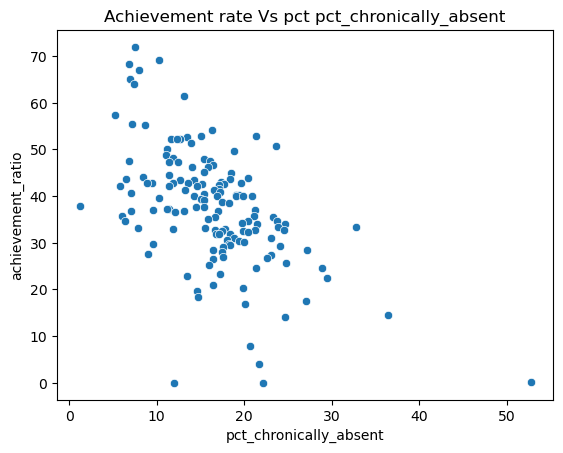

In [495]:
#plot scatter plot
sns.scatterplot(data = district_absent_2024, x = 'pct_chronically_absent', y='achievement_ratio' )
plt.title('Achievement rate Vs pct pct_chronically_absent')

In [507]:
#district discipline vs achievement
district_dicipline_2024 = avg_district_dicipline[avg_district_dicipline['year']=='2024'].merge(clean_grouped,
                                                                    left_on = 'District Name',
                                                                    right_on = 'system_name',
                                                                    how='right')
district_dicipline_2024.head()

,year,District Name,Percent Disciplined,system_name,achievement_total,number_total,achievement_ratio
0,2024,Williamson County,5.4,Williamson County,62464.0,86777,71.98
1,2024,Collierville,2.8,Collierville,13157.0,19008,69.22
2,2024,Germantown,4.3,Germantown,8065.0,11808,68.30
3,2024,Maryville,4.0,Maryville,7836.0,11676,67.11
4,2024,Arlington,7.4,Arlington,5963.0,9156,65.13


Text(0.5, 1.0, 'Achievement rate by pct of students disciplined (2024)')

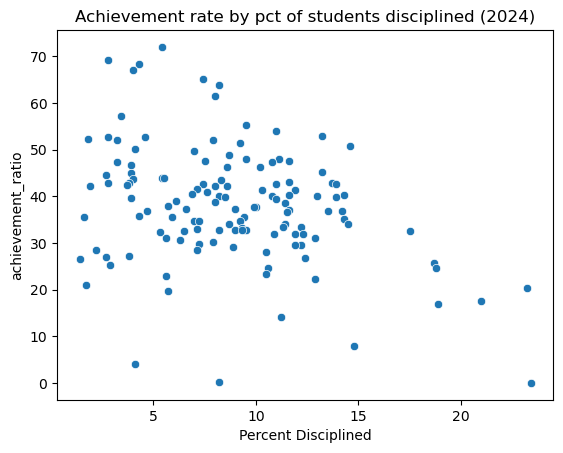

In [513]:
#scatter plot
sns.scatterplot(data = district_dicipline_2024, x = 'Percent Disciplined', y = 'achievement_ratio')
plt.title('Achievement rate by pct of students disciplined (2024)')

In [39]:
# calculate avg pct absent for year groups
absenteeism_state_year = (absenteeism[(absenteeism['student_group'] == 'All Students') & 
                     (absenteeism['grade_band'] == 'All Grades')]
                     .groupby('year')['pct_chronically_absent'].mean().reset_index()
                         )
absenteeism_state_year

,year,pct_chronically_absent
0,2021,13.730137
1,2022,18.128276
2,2023,17.872414
3,2024,16.341379


In [467]:
#combine discipline and absenteeism data
student_behavior = discipline_state_year.merge(absenteeism_state_year,
                                          on = 'year',
                                          how = 'inner')
student_behavior

,year,Percent Disciplined,pct_chronically_absent
0,2021,4.775781,13.730137
1,2022,8.304412,18.128276
2,2023,8.223134,17.872414
3,2024,8.870896,16.341379


In [ ]:
#calculate year - year achievement and plot line graph for the 3 metrix

In [515]:
#group districts in to four quartiles by achievement rate and plot grouped bar graph to compare 
#achievement rate VS discipline VS absenteeim

### student behavior across student groups (race and gender

#### gender Vs achievement rate

In [404]:
#gender absenteeism

absenteeism_gender = (absenteeism[(absenteeism['student_group'].isin(gender)) & 
                     (absenteeism['grade_band'] != 'All Grades')]
                     .groupby(['year','student_group'])['pct_chronically_absent']
                      .mean().reset_index()
                         )
absenteeism_gender.set_index('student_group', inplace = True)
absenteeism_gender


,year,pct_chronically_absent
student_group,,
Female,2024,18.214706
Male,2024,17.315018


In [378]:
#import gender discipline data
dicipline_gender_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='gender' )
dicipline_gender_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='gender')
dicipline_gender_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='gender')
dicipline_gender_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='gender')
#introduce year column
dicipline_gender_21['year'] = '20'+dicipline_gender_21['School Year'].str[-2:]
dicipline_gender_22['year'] = '20'+dicipline_gender_22['School Year'].str[-2:]
dicipline_gender_23['year'] = '20'+dicipline_gender_23['School Year'].str[-2:]
dicipline_gender_24['year'] = '20'+dicipline_gender_24['School Year'].str[-2:]

#subset the datasets for required columns
dicipline_gender_21 = dicipline_gender_21[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender_22 = dicipline_gender_22[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender__23 = dicipline_gender_23[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender_24 = dicipline_gender_24[['year','District', 'District Name', 'Gender','Percent Disciplined']]

#combine the dataset
dicipline_gender = pd.concat([dicipline_gender_21,dicipline_gender_22,dicipline_gender__23, dicipline_gender_24], ignore_index = True)

#convert data
dicipline_gender['Percent Disciplined'] = pd.to_numeric(dicipline_gender['Percent Disciplined'], errors = 'coerce')
#clean for suppressed values
dicipline_gender = dicipline_gender[dicipline_gender['Percent Disciplined'] >= 0]
dicipline_gender[dicipline_gender['year']=='2024']

,year,District,District Name,Gender,Percent Disciplined
902,2024,0,State of Tennessee,Male,12.7
904,2024,10,Anderson County,Female,7.1
905,2024,10,Anderson County,Male,12.7
908,2024,12,Oak Ridge,Female,9.1
909,2024,12,Oak Ridge,Male,17.3
...,...,...,...,...,...
1194,2024,964,Tennessee Schools for the Deaf,Male,27.3
1197,2024,985,Achievement School District,Female,7.8
1198,2024,985,Achievement School District,Male,8.6
1199,2024,987,Tennessee Public Charter School Commission,Female,4.7


In [392]:
#aggregate the data for state level and gender group
dicipline_gender_24 = dicipline_gender[dicipline_gender['year'] == '2024']
state_gender_dicipline = (dicipline_gender_24[dicipline_gender_24['District Name'] != 'State of Tennessee']
                          .groupby('Gender')['Percent Disciplined'].mean().reset_index()
                         )
state_gender_dicipline.set_index('Gender', inplace=True)

In [416]:
state_gender_dicipline


,Percent Disciplined
Gender,
Female,5.968852
Male,12.435772


In [398]:
geder_grouped.set_index('student_group',inplace = True)

In [430]:
achivement_gender_behavior = pd.concat([state_gender_dicipline,geder_grouped,absenteeism_gender], axis = 1)
achivement_gender_behavior

,Percent Disciplined,achieved_total,tests_total,achievement_rate,year,pct_chronically_absent
Female,5.968852,383600.0,960715,39.93,2024,18.214706
Male,12.435772,395186.0,1011598,39.07,2024,17.315018


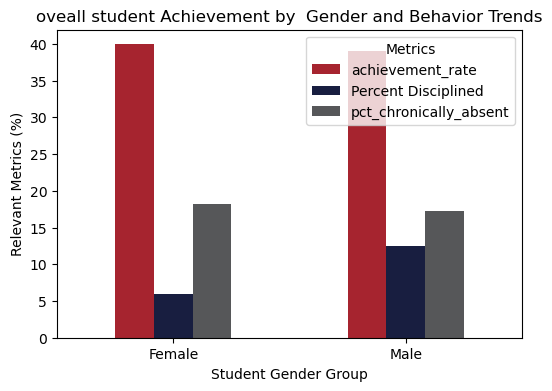

In [459]:
data = achivement_gender_behavior[['achievement_rate','Percent Disciplined','pct_chronically_absent']]

ax = data.plot(
    kind='bar', figsize=(6, 4), color=color_pallete
)

plt.xlabel('Student Gender Group')                            
plt.ylabel('Relevant Metrics (%)')  
plt.title('oveall student Achievement by  Gender and Behavior Trends')

# xticks display
plt.xticks(rotation= 'horizontal')

plt.legend(title='Metrics')

# Save and show the plot
#plt.savefig('../data/hdwy_pct_range.jpg', dpi=600)
plt.show()

#### race Vs achiement rate

In [199]:
#race group absenteeism
absenteeism_race = (absenteeism[(absenteeism['student_group'].isin(race)) & 
                     (absenteeism['grade_band'] != 'All Grades')]
                     .groupby(['year','student_group'])['pct_chronically_absent']
                    .mean().reset_index()
                         )
absenteeism_race

,year,student_group,pct_chronically_absent
18,2024,American Indian or Alaska Native,22.207619
19,2024,Asian,8.565414
20,2024,Black or African American,20.591968
21,2024,Hispanic,16.348988
22,2024,Native Hawaiian or Other Pacific Islander,20.455556
23,2024,White,17.199632


In [229]:
race_names = {
    'American Indian or Alaska Native': 'Native American/Alaskan',
    'Hispanic or Latino': 'Hispanic',
    'Native Hawaiian or Other Pacific Islander': 'Native Hawaiian/Pacific Islander'  # Removed extra space
}

def rename_race(row):
    return race_names.get(row, row)  # Using .get() avoids errors if row is not in race_names


In [231]:
absenteeism_race['student_group'] = absenteeism_race['student_group'].apply(rename_race)

In [243]:
#dicipline by student group
#import discipline by race data
dicipline_race_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='Race-Ethnicity' )
dicipline_race_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='Race-Ethnicity')
dicipline_race_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='Race-Ethnicity')
dicipline_race_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='Race-Ethnicity')

In [245]:
#add year column
dicipline_race_21['year'] = '20'+ dicipline_race_21['School Year'].str[-2:]
dicipline_race_22['year'] = '20'+ dicipline_race_22['School Year'].str[-2:]
dicipline_race_23['year'] = '20'+ dicipline_race_22['School Year'].str[-2:]
dicipline_race_24['year'] = '20'+ dicipline_race_24['School Year'].str[-2:]

In [251]:
#subset for required fields
dicipline_race_21 = dicipline_race_21[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_22 = dicipline_race_22[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_23 = dicipline_race_22[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_24 = dicipline_race_24[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
#combine the datasets
dicipline_race = pd.concat([dicipline_race_21,dicipline_race_22,dicipline_race_23,dicipline_race_24], ignore_index = True)
dicipline_race.head()

,year,District Name,Race or Ethnicity,Percent Disciplined
0,2021,State of Tennessee,Asian,1.0
1,2021,State of Tennessee,Black or African American,4.0
2,2021,State of Tennessee,Hispanic or Latino,3.0
3,2021,State of Tennessee,Native American/Alaskan,4.0
4,2021,State of Tennessee,Native Hawaiian/Pacific Islander,3.4


In [253]:
#standardize student group column
dicipline_race['Race or Ethnicity'] = dicipline_race['Race or Ethnicity'].apply(rename_race)

In [255]:
#data type conversion
dicipline_race['Percent Disciplined'] = pd.to_numeric(dicipline_race['Percent Disciplined'], errors = 'coerce')

In [275]:
# state percent diciplined by race
state_diciplined_byrace = (dicipline_race[dicipline_race['District Name'] == 'State of Tennessee']
                           .groupby(['year','Race or Ethnicity'])['Percent Disciplined']
                           .mean().reset_index()
                          )
state_diciplined_byrace.head()

,year,Race or Ethnicity,Percent Disciplined
0,2021,Asian,1.0
1,2021,Black or African American,4.0
2,2021,Hispanic,3.0
3,2021,Native American/Alaskan,4.0
4,2021,Native Hawaiian/Pacific Islander,3.4


In [259]:
#rename column for consistency
state_diciplined_byrace = state_diciplined_byrace.rename(columns = {'Race or Ethnicity':'student_group'})
state_diciplined_byrace['student_group'].unique()

array(['Asian', 'Black or African American', 'Hispanic',
       'Native American/Alaskan', 'Native Hawaiian/Pacific Islander',
       'White'], dtype=object)

In [261]:
absenteeism_race['student_group'].unique()

array(['Native American/Alaskan', 'Asian', 'Black or African American',
       'Hispanic', 'Native Hawaiian/Pacific Islander', 'White'],
      dtype=object)

In [273]:
#combine student-behavior df
student_behavior_race = absenteeism_race.merge(state_diciplined_byrace, 
                                              on = ('year', 'student_group'),
                                              how = 'inner')
student_behavior_race.head()

,year,student_group,pct_chronically_absent,Percent Disciplined
0,2021,Native American/Alaskan,16.308642,4.0
1,2021,Asian,6.901000,1.0
2,2021,Black or African American,19.250410,4.0
3,2021,Hispanic,15.554585,3.0
4,2021,Native Hawaiian/Pacific Islander,15.397368,3.4


In [269]:
#subset studet behavior for 2024
student_race_2024 =  student_behavior_race[student_behavior_race['year'] == '2024']
student_race_2024

,year,student_group,pct_chronically_absent,Percent Disciplined
12,2024,Native American/Alaskan,22.207619,9.6
13,2024,Asian,8.565414,3.3
14,2024,Black or African American,20.591968,16.4
15,2024,Hispanic,16.348988,8.1
16,2024,Native Hawaiian/Pacific Islander,20.455556,7.7
17,2024,White,17.199632,7.8


In [313]:
#combine student behavior data with overall achievement rate
#standardize race groups
race_groups['student_group'] = race_groups['student_group'].apply(rename_race)
#merge the data
overall_achivement_behavior = (student_race_2024.merge(race_groups,
                                                      on = 'student_group',
                                                      how = "inner").reset_index()
                               .sort_values(by = 'achievement_rate', ascending = False))
overall_achivement_behavior

,index,year,student_group,pct_chronically_absent,Percent Disciplined,valid_tests,achieved_total,achievement_rate
1,1,2024,Asian,8.565414,3.3,52499,33526.0,63.86
5,5,2024,White,17.199632,7.8,1153826,551323.0,47.78
0,0,2024,Native American/Alaskan,22.207619,9.6,9669,2934.0,30.34
4,4,2024,Native Hawaiian/Pacific Islander,20.455556,7.7,5367,1580.0,29.44
3,3,2024,Hispanic,16.348988,8.1,278546,77438.0,27.80
2,2,2024,Black or African American,20.591968,16.4,472406,103468.0,21.90


In [315]:
# set 'student_group' as index 
overall_achivement_behavior.set_index('student_group', inplace=True)

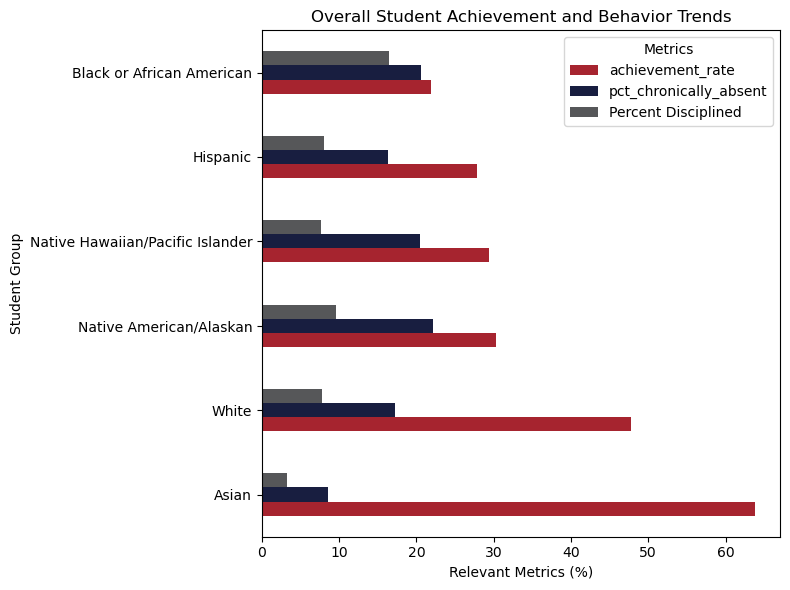

In [525]:

ax = overall_achivement_behavior[[ 'achievement_rate', 'pct_chronically_absent', 'Percent Disciplined']].plot(
    kind='barh', figsize=(8, 6), color=color_pallete
)

plt.xlabel('Relevant Metrics (%)')  # Adjusted for clarity
plt.ylabel('Student Group')
plt.title('Overall Student Achievement and Behavior Trends')

# Ensure correct yticks display
plt.yticks(ticks=range(len(overall_achivement_behavior.index)), labels=overall_achivement_behavior.index)

plt.legend(title='Metrics')
plt.tight_layout()
# Save and show the plot
#plt.savefig('../data/hdwy_pct_range.jpg', dpi=600)
plt.show()

## school staff vs achievement rate

# CRIME Vs achievement rate


# POPULATION DENSITY VS ACHIEVEMENT RATE